In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_excel('Dataset_w6.xlsx')

In [52]:
data.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface area (km2)                          196 non-null    float64
 3   Population in thousands (2017)              196 non-null    float64
 4   GDP per capita (current US$)                196 non-null    float64
 5   Agricultural production index               196 non-null    float64
 6   International trade: Imports (million US$)  196 non-null    float64
dtypes: float64(5), object(2)
memory usage: 10.8+ KB


# 1. Find out how many countries are there in the dataset.

In [4]:
data['country'].nunique()

196

Total no of countries is 196

# 2. Examine the data by using visualizations.

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

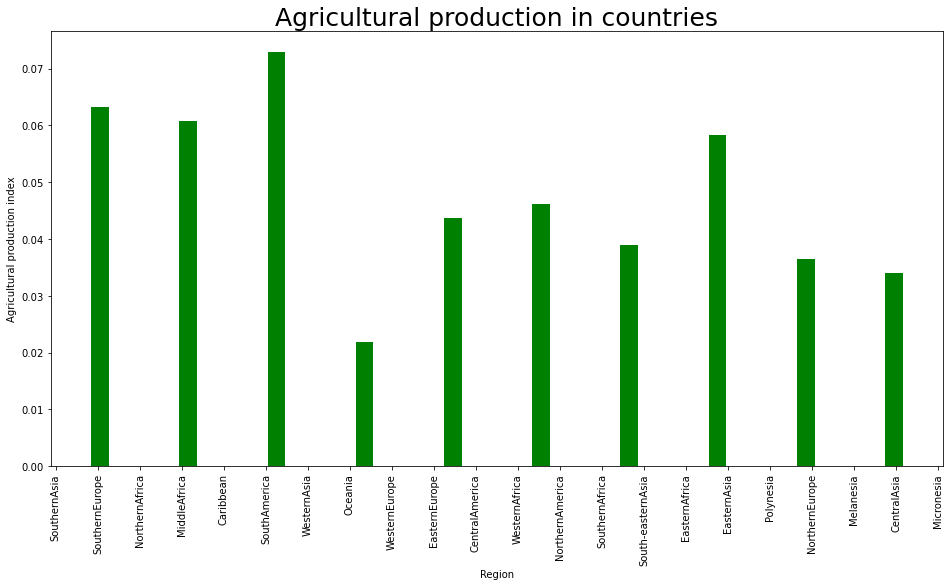

In [139]:
plt.figure(figsize=(16,8))
plt.hist(data['Region'], color='green',rwidth=0.2,density=True)
plt.title('Agricultural production in countries',fontsize=25)
plt.xlabel('Region')
plt.ylabel('Agricultural production index')
plt.xticks(rotation=90)
plt.yticks()

<AxesSubplot:xlabel='Region', ylabel='Population in thousands (2017)'>

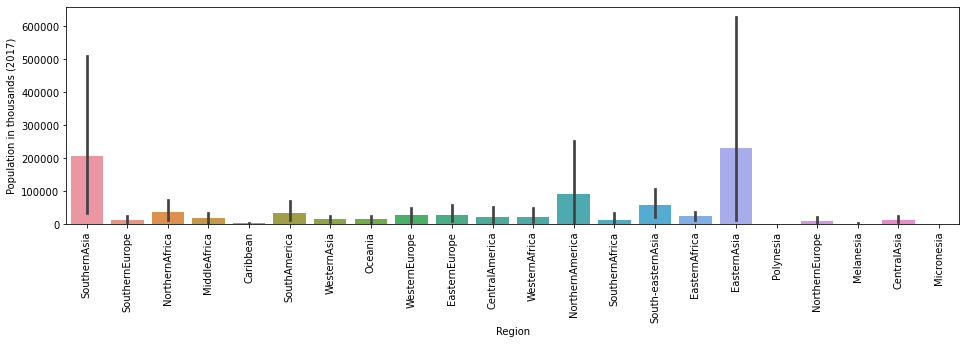

In [107]:
fig=plt.subplots(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x='Region',y='Population in thousands (2017)',data=data)

Eastern Asia and Southern Asia is having highest population

In [146]:
d1=data.groupby(['Region','country','Population in thousands (2017)',
                 'GDP per capita (current US$)','Surface area (km2)']).sum()

<AxesSubplot:xlabel='Population in thousands (2017)', ylabel='GDP per capita (current US$)'>

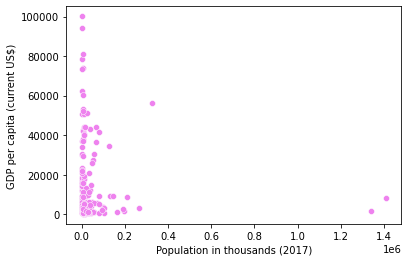

In [141]:
sns.scatterplot(x='Population in thousands (2017)',y='GDP per capita (current US$)',data=d1,color='violet')

Comparing population with GDP it forms a cluster with only 2 outliers having less GDP against huge population

<AxesSubplot:xlabel='Surface area (km2)', ylabel='Population in thousands (2017)'>

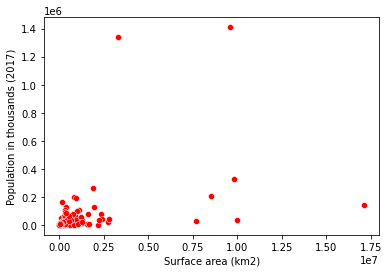

In [144]:
sns.scatterplot(x='Surface area (km2)',y='Population in thousands (2017)',data=d1,color='red')

Comparing population with Surface area it forms a cluster with few outliers having less population against larger surface area and high population against less surface area


# 3. Find out how many countries with respect to the region are available in the datase

In [151]:
data.groupby('Region')['country'].count().sort_values()

Region
Oceania               2
NorthernAmerica       4
Micronesia            4
SouthernAfrica        5
CentralAsia           5
Polynesia             5
NorthernAfrica        5
Melanesia             5
WesternEurope         7
EasternAsia           7
CentralAmerica        8
SouthernAsia          9
MiddleAfrica          9
EasternEurope        10
NorthernEurope       10
South-easternAsia    11
SouthAmerica         12
SouthernEurope       12
WesternAfrica        15
Caribbean            16
EasternAfrica        17
WesternAsia          18
Name: country, dtype: int64

# 4. On average which region has the highest
# a. GDP per capita (current US$)

In [38]:
dat3=data.groupby('Region')['GDP per capita (current US$)'].mean().round(2).sort_values()

In [37]:
dat3

Region
WesternAfrica         1013.14
EasternAfrica         2088.85
SouthernAsia          2968.40
MiddleAfrica          3928.83
NorthernAfrica        3934.96
SouthernAfrica        4191.90
CentralAsia           4329.88
Micronesia            5008.30
CentralAmerica        6348.14
SouthAmerica          8499.78
Polynesia             8686.52
Melanesia             9261.96
EasternEurope         9292.49
South-easternAsia    10299.03
SouthernEurope       14462.74
Caribbean            15135.56
WesternAsia          17013.94
EasternAsia          27967.61
NorthernEurope       42098.22
Oceania              44823.25
WesternEurope        55387.13
NorthernAmerica      57659.00
Name: GDP per capita (current US$), dtype: float64

[Text(0, 0.5, 'Mean of GDP per capita')]

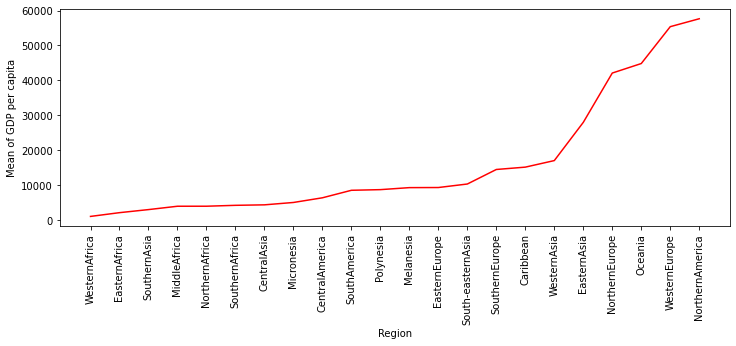

In [15]:
fig= plt.subplots(figsize=(12,4))
plt.xticks(rotation=90)
ax=sns.lineplot(data=dat3,markers=True,color='red')
ax.set(ylabel='Mean of GDP per capita')

Comparing the mean values Northern America region is having highest GDP per capita closely followed by Western Europe

# b. International trade: Imports (million US$)

In [8]:
dat4=data.groupby('Region')['International trade: Imports (million US$)'].mean().round(2).sort_values()

In [9]:
dat4

Region
Micronesia               99.00
Polynesia               432.00
Melanesia              2896.40
Caribbean              3057.31
MiddleAfrica           4381.22
EasternAfrica          4726.18
WesternAfrica          4898.33
CentralAsia           12063.40
SouthernAfrica        18005.60
SouthAmerica          32885.67
NorthernAfrica        35034.40
WesternAsia           46025.56
CentralAmerica        57031.50
SouthernAsia          58199.33
SouthernEurope        76666.67
EasternEurope         85243.90
South-easternAsia     98324.64
Oceania              112914.50
NorthernEurope       113407.20
WesternEurope        407498.43
EasternAsia          451995.00
NorthernAmerica      663552.25
Name: International trade: Imports (million US$), dtype: float64

[Text(0, 0.5, 'Mean of International Trade: Imports')]

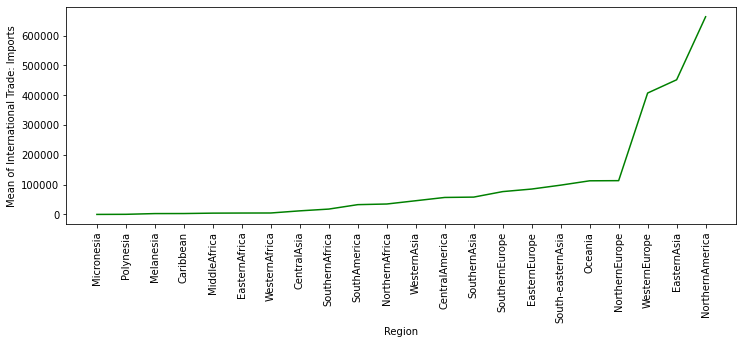

In [10]:
fig= plt.subplots(figsize=(12,4))
plt.xticks(rotation=90)
ax=sns.lineplot(data=dat4,markers=True,color='green')
ax.set(ylabel='Mean of International Trade: Imports')

Comparing the mean values Northern America region is having highest International trade: Imports.Next comes Eastern Asia

# 5. Find out which region has more consistent with respect to GDP percapita (current US$)

In [11]:
dat5=data.groupby('Region')['GDP per capita (current US$)'].std().sort_values()

In [12]:
dat5

Region
WesternAfrica          815.095399
NorthernAfrica         974.706575
SouthernAfrica        2177.551120
SouthernAsia          2855.708179
EasternAfrica         3716.131770
CentralAsia           4152.215490
CentralAmerica        4180.440883
SouthAmerica          4273.707394
Micronesia            4820.669694
MiddleAfrica          5274.846281
EasternEurope         5415.488739
Polynesia             6956.250286
Oceania               9233.329638
SouthernEurope        9541.703216
Melanesia            13855.842686
Caribbean            14579.371326
South-easternAsia    16311.810656
WesternAsia          18812.151459
NorthernEurope       20671.030185
WesternEurope        24770.467728
NorthernAmerica      25749.619445
EasternAsia          27485.120923
Name: GDP per capita (current US$), dtype: float64

[Text(0, 0.5, 'SD of GDP percapita')]

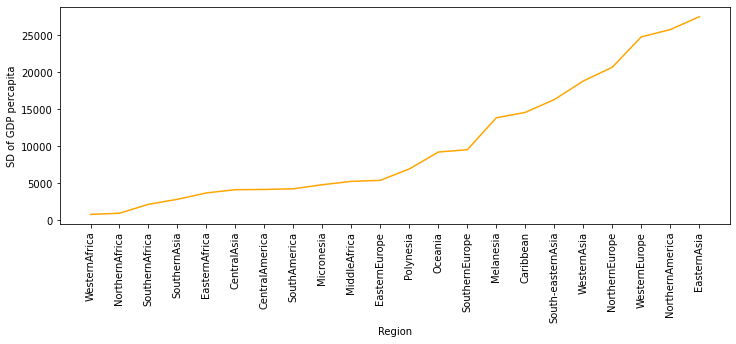

In [13]:
fig= plt.subplots(figsize=(12,4))
plt.xticks(rotation=90)
ax=sns.lineplot(data=dat5,markers=True,color='orange')
ax.set(ylabel='SD of GDP percapita' )

Considering the lesser Standard deviation Western Africa is more consistent followed by Northern Africa as it is closer to their mean values. Where as eastern asia is having the least consistency followed by Northern America.